In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:
#load the data
titanic= pd.read_csv("https://www.dropbox.com/s/4tw0ttokdrl62qs/titanic_train.csv?dl=1")

In [4]:
# select relevant columns for clustering
X = titanic[['pclass', 'age', 'sibSp', 'parch', 'fare']]
y = titanic['survived'] # This isn't needed for supervised learning, but since we have the data, we could use it to compare prediction performance


In [5]:
# handle missing values in Age column
X['age'].fillna(X['age'].mean(), inplace=True)

In [6]:
# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [13]:
print("Original Train data \n", X.head())
print("Standerdized data \n", X_std)

Original Train data 
    pclass   age  sibSp  parch     fare
0       3  22.0      1      0   7.2500
1       1  38.0      1      0  71.2833
2       3  26.0      0      0   7.9250
3       1  35.0      1      0  53.1000
4       3  35.0      0      0   8.0500
Standerdized data 
 [[ 0.82737724 -0.5924806   0.43279337 -0.47367361 -0.50244517]
 [-1.56610693  0.63878901  0.43279337 -0.47367361  0.78684529]
 [ 0.82737724 -0.2846632  -0.4745452  -0.47367361 -0.48885426]
 ...
 [ 0.82737724  0.          0.43279337  2.00893337 -0.17626324]
 [-1.56610693 -0.2846632  -0.4745452  -0.47367361 -0.04438104]
 [ 0.82737724  0.17706291 -0.4745452  -0.47367361 -0.49237783]]


### Dimensional Reduction using PCA

We standardize the data in k-means clustering (and in many other machine learning algorithms) to make sure that all the features or variables have equal importance or influence in the clustering process. Standardization scales the features so that they have a mean of 0 and a standard deviation of 1, which transforms them to a common scale and makes them comparable.

If we don't standardize the data, the features with larger values or wider ranges might dominate the clustering process and skew the results. This is because k-means clustering uses Euclidean distance to measure the similarity between data points and centroids, and features with larger values or wider ranges will have a larger impact on the distance calculation.

Standardization also makes the algorithm more numerically stable and converges faster, since the optimization process of k-means is based on minimizing the sum of squared distances, which can be sensitive to the scale of the features.

In [14]:
# reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In the context of PCA analysis, the components are linear combinations of the original features or variables that capture the most variation in the data. Each component is a new feature that is a weighted sum of the original features, such that the first component captures the most variation in the data, the second component captures the second most variation, and so on.

In the example Python code I provided earlier for k-means clustering on the Titanic dataset, we performed PCA analysis on the features 'Pclass', 'Age', 'SibSp', 'Parch', and 'Fare' after standardizing them. After performing PCA, we obtained two components, which were linear combinations of these features, that captured the most variation in the data.

The first principal component is a linear combination of all the features and represents a direction in the data that captures the most variation or spread.

The second principal component is another linear combination of the features that is orthogonal or perpendicular to the first component and captures the second most variation or spread.

Explained variance ratio: [0.3380521  0.32598107]


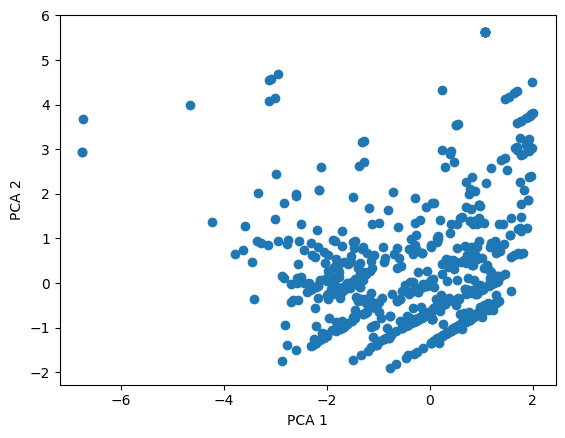

In [15]:
# print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# visualize the PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### Elbow method to find "optimal" number of k clusters

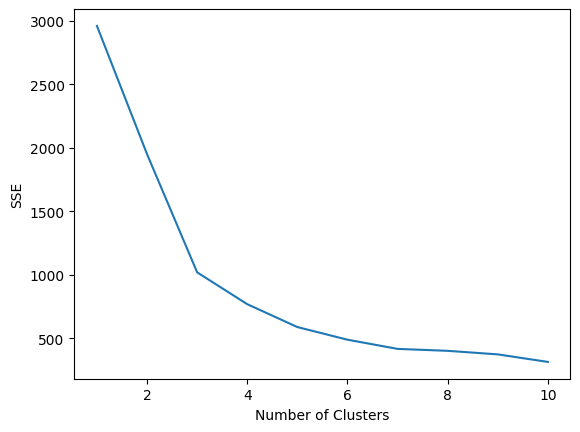

In [16]:
# find optimal number of clusters using elbow method
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

The elbow method involves plotting the SSE (sum of squared errors) against the number of clusters, and identifying the "elbow" or point of inflection on the plot where the SSE starts to level off or form a bend. The elbow represents the trade-off between the number of clusters and the SSE, and indicates the number of clusters that gives a good balance between cluster purity and complexity.

However, it's important to note that the elbow method is not always definitive and can sometimes be subjective or ambiguous. In practice, you might need to experiment with different values of k and evaluate the clustering results using other metrics, such as silhouette score or cluster purity, to determine the optimal number of clusters for your specific problem.

In [17]:
# fit k-means model with optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)


KMeans(n_clusters=2, random_state=42)

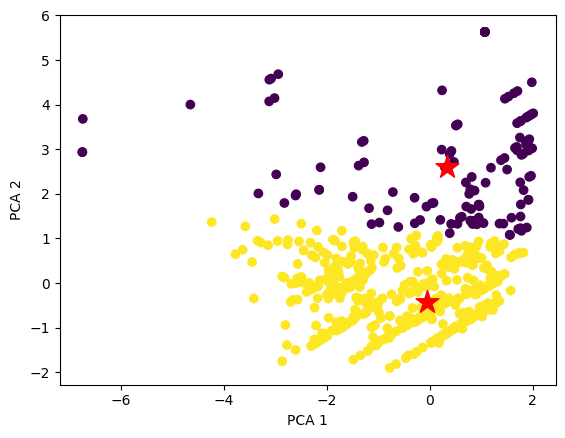

In [18]:
# visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [19]:
# add cluster labels to original dataset
titanic['Cluster'] = kmeans.labels_

### Since we know the target labels, we can see how well this algo performed

Typically, in unsupervised learning, we do not have target labels

In [20]:
# calculate accuracy of clustering on survival
accuracy = accuracy_score(y, kmeans.labels_)
print('Accuracy of clustering on survival: {:.2f}%'.format(accuracy * 100))

Accuracy of clustering on survival: 38.72%


#### LEt's play around and see how accuracy changes based on number of clusters

Note that this is simply to show intuition - this is NOT a part of unsupervised learning

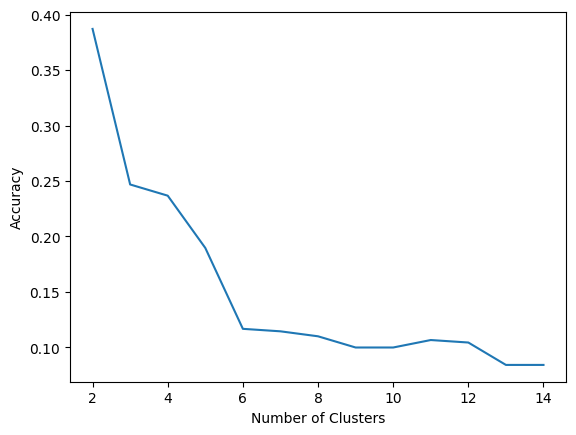

In [21]:
# calculate accuracy for different number of clusters
accuracy = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    y_pred = kmeans.labels_
    acc = accuracy_score(y, y_pred)
    accuracy.append(acc)

# plot accuracy vs number of clusters
plt.plot(range(2, 15), accuracy)
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.show()

In [27]:
# fit k-means model with optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)


KMeans(n_clusters=2, random_state=42)

In [28]:
# add cluster labels to original dataset
titanic['Cluster'] = kmeans.labels_

In [29]:
# calculate accuracy of clustering on survival
accuracy = accuracy_score(y, kmeans.labels_)
print('Accuracy of clustering on survival: {:.2f}%'.format(accuracy * 100))

Accuracy of clustering on survival: 38.72%


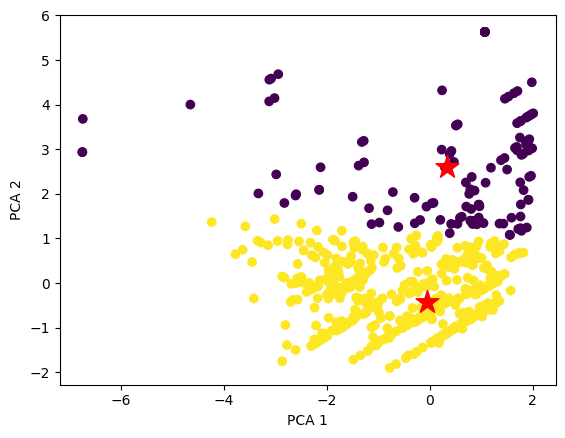

In [30]:
# visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()